**Nallely Lizbeth Serna Rivera - A00833111**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


In [2]:
# Cargar los datos desde un archivo CSV. Se omite la primera fila (encabezados).
data = np.genfromtxt('Valhalla23 (1).csv', delimiter=',', skip_header=1)
X = data[:, 0].reshape(-1, 1)  # X es un vector columna con las temperaturas en Celsius
y = data[:, 1]  # y es un vector con las temperaturas en Valks


In [3]:
# Dividir los datos en conjuntos de entrenamiento y prueba.
# El 80% de los datos se utilizará para entrenar el modelo, y el 20% para probarlo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Escalar los datos para que tengan media 0 y desviación estándar 1.
# Esto es importante para que el modelo se entrene de manera más eficiente.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Inicializar el modelo de regresión lineal utilizando un Descenso de Gradiente Estocástico (SGD).
# max_iter = 1000: número máximo de iteraciones para el algoritmo.
# learning_rate = 'constant': la tasa de aprendizaje no cambia durante el entrenamiento.
# eta0 = 0.001: tasa de aprendizaje inicial.
# random_state = 42: asegura la reproducibilidad de los resultados.
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.001, random_state=42)
model.fit(X_train_scaled, y_train)


### Selección de Hiperparámetros

#Criterio: Elegí un valor alto de iteraciones (1000) para asegurar que el modelo tenga suficientes
#oportunidades para converger a una solución óptima. Esto es importante en problemas donde el gradiente
#puede ser muy pequeño, lo que requiere más pasos para que el modelo alcance el mínimo de la función de costo.
#Aunque el mínimo requerido era 100 iteraciones, aumentar este valor a 1000 garantiza un entrenamiento más robusto.

#Criterio: La tasa de aprendizaje (`eta0`) se configuró en 0.001 para mantener pequeños los pasos en la dirección
#del gradiente, evitando así que el modelo dé pasos demasiado grandes que puedan hacer que se salte el mínimo de la
#función de costo. Elegí un valor conservador porque en datasets pequeños, como el que se utiliza en este proyecto,
#un valor más alto podría llevar a una convergencia inestable. Además, el aprendizaje constante
 #(`learning_rate='constant'`) permite que la tasa de aprendizaje permanezca fija a lo largo de todas las iteraciones,
 #lo que ayuda en la estabilidad del entrenamiento y es adecuado cuando se espera que la función de costo sea
 #relativamente suave.



SGDRegressor(eta0=0.001, learning_rate='constant', random_state=42)

In [6]:
# Generar predicciones para el conjunto de entrenamiento.
y_train_pred = model.predict(X_train_scaled)
# Generar predicciones para el conjunto de prueba.
y_test_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE) para el conjunto de entrenamiento.
train_mse = mean_squared_error(y_train, y_train_pred)
# Calcular el error cuadrático medio (MSE) para el conjunto de prueba.
test_mse = mean_squared_error(y_test, y_test_pred)

# Imprimir los resultados del MSE para ambos conjuntos.
print("MSE en el conjunto de entrenamiento:", train_mse)
print("MSE en el conjunto de prueba:", test_mse)


MSE en el conjunto de entrenamiento: 50.49208479572475
MSE en el conjunto de prueba: 20.047448080518517


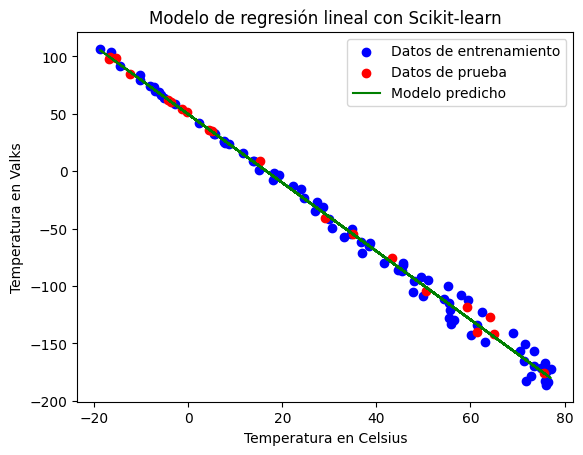

In [7]:
# Crear un gráfico de dispersión para visualizar los datos y el modelo entrenado.
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.plot(X_train, y_train_pred, color='green', label='Modelo predicho')
plt.xlabel("Temperatura en Celsius")
plt.ylabel("Temperatura en Valks")
plt.legend()
plt.title("Modelo de regresión lineal con Scikit-learn")
plt.show()
